In [217]:
#### Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import urllib
from urllib.request import urlopen
import json
import csv
# import simplejson
import pandas as pd
# import pytest
import base64
import sys
import glob
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
from bs4 import BeautifulSoup
import requests
import scipy.stats
import statistics as s
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Observations:

In [177]:
# Pass Pct. seems to have a high impact
# Sacks seem to not be significantly impactful for an offense
# QBR seems to have significant impact

In [4]:
#Top 5 Teams Bar Chart
overall = "NFL_Standings/Overall/Overall_Standings_Combined.csv"
overall = pd.read_csv(overall)
overall.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)
overall.set_index("Season")
overall.head(8)
new_england = mpatches.Patch(color='navy', label='NE')
pit_steelers = mpatches.Patch(color='black', label='PIT')
sea_seahawks = mpatches.Patch(color='lime', label='SEA')
gb_packers = mpatches.Patch(color='darkgreen', label='GB')
kc_chiefs = mpatches.Patch(color='red', label='KC')
car_panthers = mpatches.Patch(color='dodgerblue', label='CAR')
den_broncos = mpatches.Patch(color='orange', label='DEN')
ari_cardinals = mpatches.Patch(color='yellow', label='ARI')
colors = ["navy", "black", "lime", "darkgreen", "red", "dodgerblue", "orange", "yellow"]
cle_browns = mpatches.Patch(color='saddlebrown', label='CLE')
stl_rams = mpatches.Patch(color='darkgoldenrod', label='STL')
sd_chargers = mpatches.Patch(color='mediumblue', label='SD')
chi_bears = mpatches.Patch(color='orangered', label='CHI')
sf_49ers = mpatches.Patch(color='crimson', label='SF')
tb_bucs = mpatches.Patch(color='slategray', label='TB')
jax_jags = mpatches.Patch(color='teal', label='JAX')
ny_jets = mpatches.Patch(color='forestgreen', label='NYJ')
colors2 = ["saddlebrown", "darkgoldenrod", "mediumblue", "orangered", "crimson", "slategray", "teal", "forestgreen"]
handles = [new_england, pit_steelers, sea_seahawks, gb_packers, 
           kc_chiefs, car_panthers, den_broncos, ari_cardinals, 
           cle_browns, stl_rams, sd_chargers, chi_bears, 
           sf_49ers, tb_bucs, jax_jags, ny_jets]
handles2 = [cle_browns, stl_rams, sd_chargers, chi_bears, 
            sf_49ers, tb_bucs, jax_jags, ny_jets]
#Team Overall Standings/Stats by Season
# overall[["Season", "#Team Abbr."]]
# overall.groupby(x.index).sum()
# team = overall.groupby(["Season","#Team Abbr.", "#Rank", "#Wins", "#Losses"]).sum()
# list(conference.columns.values)
# team
# sptTotals = team[["#KB", "#KrRet", "#KrYds", "#KrAvg", "#KrLng","#KrTD", 
#                         "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 
#                         "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
#                         "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 
#                         "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",
#                         "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",
#                         "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", "#FgAtt50Plus",
#                         "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", "#XpAtt", 
#                         "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", "#KoYds",
#                         "#KoOOB", '#KoAvg', "#KoTB", "#KoRet", "#KoRetYds", 
#                         "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", "#Punts", 
#                         "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", "#PuntNetAvg", 
#                         "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", "#PuntIn20Pct", 
#                         "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", "#PuntRetYds", "#PuntRetAvg"
# ]]
# sptTotals.head()
# offTotals = overall[["#PassAttempts", "#PassCompletions", "#PassPct", "#PassAttemptsPerGame", 
#                         "#PassGrossYards", "#PassNetYards", "#PassYardsPerAtt", "#PassYardsPerGame", "#PassTD", "#PassTDPct", 
#                         "#PassInt", "#PassIntPct", "#PassLng", "#PassAvg", "#Pass20Plus", 
#                         "#Pass40Plus", "#PassSacks", "#PassSackY", "#QBRating", "#RushAttempts", 
#                         "#RushAttemptsPerGame", "#RushYards", "#RushAverage", "#RushYardsPerGame", "#RushTD", 
#                         "#RushLng", "#Rush1stDowns", "#Rush1stDownsPct", "#Rush20Plus", "#Rush40Plus", 
#                         "#RushFumbles", "#Receptions", "#RecYards", "#RecAverage", 
#                         "#RecYardsPerGame", "#RecTD", "#RecLng", "#Rec1stDowns", "#Rec20Plus", 
#                         "#Rec40Plus", "#RecFumbles"
#                        ]]
# offTotals.head()
# defTotals = team[["#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#SackYds", 
#                         "#TacklesForLoss", "#Interceptions", "#IntTD", "#IntYds", "#IntAverage", 
#                         "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#StuffYds",
#                         "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
#                         "#FumRecYds", "#FumTotalRec", "#FumTD"
# ]]
# defTotals.head()

# Offensive Plots

In [5]:
#Y values for all Offensive Categories
team_df1 = overall.groupby(["#Team Abbr."]).sum()
# list(conference.columns.values)
team_df2 = overall
# team_df1.join(team_df2, on="Season", how="left")
del team_df1["#Team ID"]
del team_df1["#Rank"]
tier1 = team_df1.nlargest(8, "#Wins")

#Categories for Tier 1 Teams
x1 = tier1["#Wins"]
x1 = pd.DataFrame(x1)
x1
#Passing
ypAtt = tier1["#PassAttempts"]
ypAtt = pd.DataFrame(ypAtt)
ypCom = tier1["#PassCompletions"]
ypCom = pd.DataFrame(ypCom)
ypPct = tier1["#PassPct"]
ypPct = pd.DataFrame(ypPct)
ypAPG = tier1["#PassAttemptsPerGame"]
ypAPG = pd.DataFrame(ypAPG)
ypGY = tier1["#PassGrossYards"]
ypGY = pd.DataFrame(ypGY)
ypNY = tier1["#PassNetYards"]
ypNY = pd.DataFrame(ypNY)
ypYPA = tier1["#PassYardsPerAtt"]
ypYPA = pd.DataFrame(ypYPA)
ypYPG = tier1["#PassYardsPerGame"]
ypYPG = pd.DataFrame(ypYPG)
ypTD = tier1["#PassTD"]
ypTD = pd.DataFrame(ypTD)
ypTDPct = tier1["#PassTDPct"]
ypTDPct = pd.DataFrame(ypTDPct)
ypInt = tier1["#PassInt"]
ypInt = pd.DataFrame(ypInt)
ypIntPct = tier1["#PassIntPct"]
ypIntPct = pd.DataFrame(ypIntPct)
ypLng = tier1["#PassLng"]
ypLng = pd.DataFrame(ypLng)
ypAvg = tier1["#PassAvg"]
ypAvg = pd.DataFrame(ypAvg)
yp20 = tier1["#Pass20Plus"]
yp20 = pd.DataFrame(yp20)
yp40 = tier1["#Pass40Plus"]
yp40 = pd.DataFrame(yp40)
ypSack = tier1["#PassSacks"]
ypSack = pd.DataFrame(ypSack)
ypSackY = tier1["#PassSackY"]
ypSackY = pd.DataFrame(ypSackY)
ypQBR = tier1["#QBRating"]
ypQBR = pd.DataFrame(ypQBR)

#Rushing
yRAtt = tier1["#RushAttempts"]
yRAtt = pd.DataFrame(yRAtt)
yRAPG = tier1["#RushAttemptsPerGame"]
yRAPG = pd.DataFrame(yRAPG)
yRYds = tier1["#RushYards"]
yRYds = pd.DataFrame(yRYds)
yRAvg = tier1["#RushAverage"]
yRAvg = pd.DataFrame(yRAvg)
yRYPG = tier1["#RushYardsPerGame"]
yRYPG = pd.DataFrame(yRYPG)
yRTD = tier1["#RushTD"]
yRTD = pd.DataFrame(yRTD)
yRLng = tier1["#RushLng"]
yRLng = pd.DataFrame(yRLng)
yR1st = tier1["#Rush1stDowns"]
yR1st = pd.DataFrame(yR1st)
yR1Pct = tier1["#Rush1stDownsPct"]
yR1Pct = pd.DataFrame(yR1Pct)
yR20 = tier1["#Rush20Plus"]
yR20 = pd.DataFrame(yR20)
yR40 = tier1["#Rush40Plus"]
yR40 = pd.DataFrame(yR40)
yRFmb = tier1["#RushFumbles"]

#Receiving
yRFmb = pd.DataFrame(yRFmb)
ypRec = tier1["#Receptions"]
ypRec = pd.DataFrame(ypRec)
ypReYds = tier1["#RecYards"]
ypReYds = pd.DataFrame(ypReYds)
ypRAvg = tier1["#RecAverage"]
ypRAvg = pd.DataFrame(ypRAvg)
ypRYPG = tier1["#RecYardsPerGame"]
ypRYPG = pd.DataFrame(ypRYPG)
ypRecTD = tier1["#RecTD"]
ypRecTD = pd.DataFrame(ypRecTD)
ypRecLng = tier1["#RecLng"]
ypRecLng = pd.DataFrame(ypRecLng)
ypRec1st = tier1["#Rec1stDowns"]
ypRec1st = pd.DataFrame(ypRec1st)
ypRec20 = tier1["#Rec20Plus"]
ypRec20 = pd.DataFrame(ypRec20)
ypRec40 = tier1["#Rec40Plus"]
ypRec40 = pd.DataFrame(ypRec40)
ypRecFmb = tier1["#RecFumbles"]
ypRecFmb = pd.DataFrame(ypRecFmb)

In [6]:
#Categories for Tier 2 Teams
#Y values for all Offensive Categories
team_df1 = overall.groupby(["#Team Abbr."]).sum()
# list(conference.columns.values)
team_df2 = overall
# team_df1.join(team_df2, on="Season", how="left")
del team_df1["#Team ID"]
del team_df1["#Rank"]
tier2 = team_df1.nsmallest(10, "#Wins")
tier2 = tier2.drop(["LAC", "LA"])
x2 = tier2["#Wins"]
x2 = pd.DataFrame(x2)
#Passing
ypAtt2 = tier2["#PassAttempts"]
ypAtt2 = pd.DataFrame(ypAtt2)
ypCom2 = tier2["#PassCompletions"]
ypCom2 = pd.DataFrame(ypCom2)
ypPct2 = tier2["#PassPct"]
ypPct2 = pd.DataFrame(ypPct2)
ypAPG2 = tier2["#PassAttemptsPerGame"]
ypAPG2 = pd.DataFrame(ypAPG2)
ypGY2 = tier2["#PassGrossYards"]
ypGY2 = pd.DataFrame(ypGY2)
ypNY2 = tier2["#PassNetYards"]
ypNY2 = pd.DataFrame(ypNY2)
ypYPA2 = tier2["#PassYardsPerAtt"]
ypYPA2 = pd.DataFrame(ypYPA2)
ypYPG2 = tier2["#PassYardsPerGame"]
ypYPG2 = pd.DataFrame(ypYPG2)
ypTD2 = tier2["#PassTD"]
ypTD2 = pd.DataFrame(ypTD2)
ypTDPct2 = tier2["#PassTDPct"]
ypTDPct2 = pd.DataFrame(ypTDPct2)
ypInt2 = tier2["#PassInt"]
ypInt2 = pd.DataFrame(ypInt2)
ypIntPct2 = tier2["#PassIntPct"]
ypIntPct2 = pd.DataFrame(ypIntPct2)
ypLng2 = tier2["#PassLng"]
ypLng2 = pd.DataFrame(ypLng2)
ypAvg2 = tier2["#PassAvg"]
ypAvg2 = pd.DataFrame(ypAvg2)
yp202 = tier2["#Pass20Plus"]
yp202 = pd.DataFrame(yp202)
yp402 = tier2["#Pass40Plus"]
yp402 = pd.DataFrame(yp402)
ypSack2 = tier2["#PassSacks"]
ypSack2 = pd.DataFrame(ypSack2)
ypSackY2 = tier2["#PassSackY"]
ypSackY2 = pd.DataFrame(ypSackY2)
ypQBR2 = tier2["#QBRating"]
ypQBR2 = pd.DataFrame(ypQBR2)

#Rushing
yRAtt2 = tier2["#RushAttempts"]
yRAtt2 = pd.DataFrame(yRAtt2)
yRAPG2 = tier2["#RushAttemptsPerGame"]
yRAPG2 = pd.DataFrame(yRAPG2)
yRYds2 = tier2["#RushYards"]
yRYds2 = pd.DataFrame(yRYds2)
yRAvg2 = tier2["#RushAverage"]
yRAvg2 = pd.DataFrame(yRAvg2)
yRYPG2 = tier2["#RushYardsPerGame"]
yRYPG2 = pd.DataFrame(yRYPG2)
yRTD2 = tier2["#RushTD"]
yRTD2 = pd.DataFrame(yRTD2)
yRLng2 = tier2["#RushLng"]
yRLng2 = pd.DataFrame(yRLng2)
yR1st2 = tier2["#Rush1stDowns"]
yR1st2 = pd.DataFrame(yR1st2)
yR1Pct2 = tier2["#Rush1stDownsPct"]
yR1Pct2 = pd.DataFrame(yR1Pct2)
yR202 = tier2["#Rush20Plus"]
yR202 = pd.DataFrame(yR202)
yR402 = tier2["#Rush40Plus"]
yR402 = pd.DataFrame(yR402)
yRFmb2 = tier2["#RushFumbles"]

#Receiving
yRFmb2 = pd.DataFrame(yRFmb2)
ypRec2 = tier2["#Receptions"]
ypRec2 = pd.DataFrame(ypRec2)
ypReYds2 = tier2["#RecYards"]
ypReYds2 = pd.DataFrame(ypReYds2)
ypRAvg2 = tier2["#RecAverage"]
ypRAvg2 = pd.DataFrame(ypRAvg2)
ypRYPG2 = tier2["#RecYardsPerGame"]
ypRYPG2 = pd.DataFrame(ypRYPG2)
ypRecTD2 = tier2["#RecTD"]
ypRecTD2 = pd.DataFrame(ypRecTD2)
ypRecLng2 = tier2["#RecLng"]
ypRecLng2 = pd.DataFrame(ypRecLng2)
ypRec1st2 = tier2["#Rec1stDowns"]
ypRec1st2 = pd.DataFrame(ypRec1st2)
ypRec202 = tier2["#Rec20Plus"]
ypRec202 = pd.DataFrame(ypRec202)
ypRec402 = tier2["#Rec40Plus"]
ypRec402 = pd.DataFrame(ypRec402)
ypRecFmb2 = tier2["#RecFumbles"]
ypRecFmb2 = pd.DataFrame(ypRecFmb2)

In [7]:
# for teams in off_list["NE"]:
#     print(teams.mean())
# # #         off_list.append([["Mean",teams.mean()]])
# #     print(len(off_list["NE"]))
# #     print(teams.stack().std())
# # off_list.stack().std()
# off_list
colors = ["navy", "black", "lime", "darkgreen", "red", "dodgerblue", "orange", "yellow"]
team_index = x1.index
team_index = pd.DataFrame(team_index)
x2["#Wins"]

#Team Abbr.
CLE    11
STL    13
SD     18
CHI    19
SF     21
TB     22
JAX    23
NYJ    24
Name: #Wins, dtype: int64

In [8]:
#Total Offense List
off_list=[ypAtt["#PassAttempts"], ypCom["#PassCompletions"], ypPct["#PassPct"], ypAPG["#PassAttemptsPerGame"], ypGY["#PassGrossYards"], 
          ypNY["#PassNetYards"], ypYPA["#PassYardsPerAtt"], ypYPG["#PassYardsPerGame"], ypTD["#PassTD"], ypTDPct["#PassTDPct"],
          ypInt["#PassInt"], ypIntPct["#PassIntPct"], ypLng["#PassLng"], ypAvg["#PassAvg"], ypSack["#PassSacks"],
          ypSackY["#PassSackY"], yp20["#Pass20Plus"], yp40["#Pass40Plus"], ypQBR["#QBRating"],
          yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
          yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
          yR40["#Rush40Plus"], yRFmb["#RushFumbles"], ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"],
          ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"], ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], 
          ypRec40["#Rec40Plus"], ypRecFmb["#RecFumbles"]]
off_list = pd.DataFrame(off_list)
len(off_list)

41

In [9]:
off_list2=[ypAtt2["#PassAttempts"], ypCom2["#PassCompletions"], ypPct2["#PassPct"], ypAPG2["#PassAttemptsPerGame"], ypGY2["#PassGrossYards"], 
          ypNY2["#PassNetYards"], ypYPA2["#PassYardsPerAtt"], ypYPG2["#PassYardsPerGame"], ypTD2["#PassTD"], ypTDPct2["#PassTDPct"],
          ypInt2["#PassInt"], ypIntPct2["#PassIntPct"], ypLng2["#PassLng"], ypAvg2["#PassAvg"], ypSack2["#PassSacks"],
          ypSackY2["#PassSackY"], yp202["#Pass20Plus"], yp402["#Pass40Plus"], ypQBR2["#QBRating"],
          yRAtt2["#RushAttempts"], yRAPG2["#RushAttemptsPerGame"], yRYds2["#RushYards"], yRAvg2["#RushAverage"], yRYPG2["#RushYardsPerGame"], 
          yRTD2["#RushTD"], yRLng2["#RushLng"], yR1st2["#Rush1stDowns"], yR1Pct2["#Rush1stDownsPct"], yR202["#Rush20Plus"],
          yR402["#Rush40Plus"], yRFmb2["#RushFumbles"], ypRec2["#Receptions"], ypReYds2["#RecYards"], ypRAvg2["#RecAverage"],
          ypRYPG2["#RecYardsPerGame"], ypRecTD2["#RecTD"], ypRecLng2["#RecLng"], ypRec1st2["#Rec1stDowns"], ypRec202["#Rec20Plus"], 
          ypRec402["#Rec40Plus"], ypRecFmb2["#RecFumbles"]]
off_list2 = pd.DataFrame(off_list2)
len(off_list2)

41

In [272]:
#QB List
qb_list=[ypAtt["#PassAttempts"], ypCom["#PassCompletions"], ypPct["#PassPct"], ypAPG["#PassAttemptsPerGame"], ypGY["#PassGrossYards"], 
          ypNY["#PassNetYards"], ypYPA["#PassYardsPerAtt"], ypYPG["#PassYardsPerGame"], ypTD["#PassTD"], ypTDPct["#PassTDPct"],
          ypInt["#PassInt"], ypIntPct["#PassIntPct"], ypLng["#PassLng"], ypAvg["#PassAvg"], ypSack["#PassSacks"],
          ypSackY["#PassSackY"], yp20["#Pass20Plus"], yp40["#Pass40Plus"], ypQBR["#QBRating"]]

In [11]:
#QB List
qb_list2=[ypAtt2["#PassAttempts"], ypCom2["#PassCompletions"], ypPct2["#PassPct"], ypAPG2["#PassAttemptsPerGame"], ypGY2["#PassGrossYards"], 
          ypNY2["#PassNetYards"], ypYPA2["#PassYardsPerAtt"], ypYPG2["#PassYardsPerGame"], ypTD2["#PassTD"], ypTDPct2["#PassTDPct"],
          ypInt2["#PassInt"], ypIntPct2["#PassIntPct"], ypLng2["#PassLng"], ypAvg2["#PassAvg"], ypSack2["#PassSacks"],
          ypSackY2["#PassSackY"], yp202["#Pass20Plus"], yp402["#Pass40Plus"], ypQBR2["#QBRating"]]

In [12]:
#Rush Off List
rush_list = [yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
             yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
             yR40["#Rush40Plus"], yRFmb["#RushFumbles"]]

In [13]:
#Rush Off List
rush_list2 = [
          yRAtt2["#RushAttempts"], yRAPG2["#RushAttemptsPerGame"], yRYds2["#RushYards"], yRAvg2["#RushAverage"], yRYPG2["#RushYardsPerGame"], 
          yRTD2["#RushTD"], yRLng2["#RushLng"], yR1st2["#Rush1stDowns"], yR1Pct2["#Rush1stDownsPct"], yR202["#Rush20Plus"],
          yR402["#Rush40Plus"], yRFmb2["#RushFumbles"]]

In [14]:
#Rec Off List
rec_list = [ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"], ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], 
            ypRecLng["#RecLng"], ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"], ypRecFmb["#RecFumbles"]]

In [15]:
#Rec Off List
rec_list2 = [ypRec2["#Receptions"], ypReYds2["#RecYards"], ypRAvg2["#RecAverage"], ypRYPG2["#RecYardsPerGame"], ypRecTD2["#RecTD"], 
             ypRecLng2["#RecLng"], ypRec1st2["#Rec1stDowns"], ypRec202["#Rec20Plus"], ypRec402["#Rec40Plus"], ypRecFmb2["#RecFumbles"]]

In [264]:
tier1_mean = tier1.groupby(by=["#Team Abbr."]).mean()
tier1_mean.iloc[:, [1]].(axis=1)

SyntaxError: invalid syntax (<ipython-input-264-9f8363f22da8>, line 2)

In [270]:
# scipy.stats.describe(qb_list)
# qb_list
# legend_list = ["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"]
# qb_list = pd.DataFrame(qb_list)
# qb_list[["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"]].iloc[ [0] ].mean(axis=0)

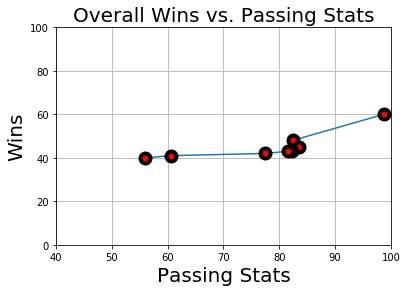

#Team Abbr.
NE     98.7250
PIT    82.4000
SEA    83.4750
GB     82.3000
KC     81.5875
CAR    77.4125
DEN    60.5250
ARI    55.9500
Name: #QBRating, dtype: float64
#Team Abbr.
CLE     73.675
STL     40.050
SD      69.100
CHI     85.475
SF      83.150
TB      84.550
JAX    103.750
NYJ     79.425
Name: #QBRating, dtype: float64


In [278]:
#St DEV

x=np.array(qb_list[18]/8)
y = np.array(x1["#Wins"])
plt.errorbar(x, y, 
             marker="o", 
             mfc="red", 
             mec="black", 
             ms=10, 
             mew=4, capsize=1, capthick=1)
plt.grid(True)
# plt.legend(handles=handles, loc="upper right")
plt.title("Overall Wins vs. Passing Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.xlabel("Passing Stats", fontsize=20)
plt.ylim(0,100)
plt.xlim(40,100)
plt.figure(figsize=(30,30), dpi=80)
plt.show()
print(qb_list[18]/8)
print(qb_list2[18]/4)

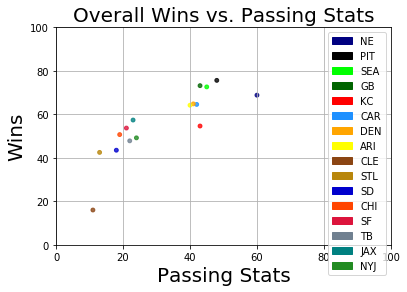

#Team Abbr.
NE     68.8125
PIT    75.6250
SEA    72.6250
GB     73.1875
KC     54.6250
CAR    64.5625
DEN    64.8125
ARI    64.1875
Name: #PassLng, dtype: float64 #Team Abbr.
CLE    16.0000
STL    42.5000
SD     43.5000
CHI    50.6875
SF     53.6875
TB     47.8125
JAX    57.3750
NYJ    49.1875
Name: #PassLng, dtype: float64


In [18]:
# #First Plot, QB Stats
# #If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
yplot_Pas = np.array(qb_list[12]/16)
xplot_Pas = np.array([x1["#Wins"]])
yplot_Pas2 = np.array(qb_list2[12]/16)
xplot_Pas2 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas2, 
            yplot_Pas2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
# xplot_Pas = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
plt.scatter(x=xplot_Pas, 
            y=yplot_Pas,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles=handles, loc="upper right")
plt.title("Overall Wins vs. Passing Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.xlabel("Passing Stats", fontsize=20)
plt.ylim(0,100)
plt.xlim(0,100)
plt.figure(figsize=(30,30), dpi=80)
plt.show()
print(qb_list[12]/16, qb_list2[12]/16)

In [2]:
# # #First Plot, showing Passes over 20 yards
# # #If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()


# legend_list = ["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"]
# yplot_Rec = np.array(qb_list)
# xplot_Rec = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
# plt.scatter(xplot_Rec, yplot_Rec, marker="o")
# x_axis = xplot_Rec
# y_axis = yplot_Rec
# plt.scatter(x=xplot_Rec, 
#             y=yplot_Rec,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# # plt.plot()
# plt.grid(True)
# # colors = ["navy", "black", "lime", "darkgreen", "red", "dodgerblue", "orange", "yellow"]

# plt.legend(handles=[new_england, pit_steelers, sea_seahawks, gb_packers, 
#                     kc_chiefs, car_panthers, den_broncos, ari_cardinals])
# plt.title("Overall Wins vs. Receiving Stats", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.xlabel("Receiving Stats", fontsize=20)
# # ax = plt.scatter(x=xplot_Rec, y=yplot_Rec, color=colors, label=x1.index);
# #Labels and dimensions for plot
# plt.ylim(0,3000)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# # plt.legend([rec_list], [legend_list])
# # plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])
# # lgnd = plt.legend(["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"], fontsize='small', mode='Expanded', 
# #                 numpoints=1, scatterpoints=1,
# #                 loc="upper right", title="Teams",
# #                 labelspacing=0.5)
# # lgnd.legendHandles[0]._sizes = [30]
# # lgnd.legendHandles[1]._sizes = [30]
# # lgnd.legendHandles[2]._sizes = [30]
# # plt.plot(x_axis, y_axis, marker="o", color=colors)

# #create ticks on x-axis
# # tick_locations = [value + 0.4 for value in xplot_Rec.any()]
# # plt.xticks(tick_locations, legend_list)
# # tick_locations
# plt.show()

# # colors = ["navy", "black", "lime", "darkgreen", "red", "dodgerblue", "orange", "yellow"]
# # team_names = ["DAL", "DEN", "GB", "SEA", "NE", "DET", "CIN", "PIT"]
# # yplot_Rec = np.array([ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"],
# #                      ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"],
# #                      ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"],
# #                      ypRecFmb["#RecFumbles"]])
# # xplot_Rec = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
# #                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
# # plt.scatter(xplot_Rec, yplot_Rec, marker="o", facecolors = colors)
# # plt.grid(True)
# # plt.legend()
# # plt.show()

### Passing Plots

In [ ]:
# #First Plot, showing Passes over 20 yards
# #If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
# #_______QB List____________
# plt.scatter(x1["#Wins"],
#         ypAtt["#PassAttempts"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypCom["#PassCompletions"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypPct["#PassPct"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypAPG["#PassAttemptsPerGame"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypGY["#PassGrossYards"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypNY["#PassNetYards"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypYPA["#PassYardsPerAtt"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypYPG["#PassYardsPerGame"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypTD["#PassTD"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypTDPct["#PassTDPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypInt["#PassInt"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypIntPct["#PassIntPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypLng["#PassLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypAvg["#PassAvg"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypSack["#PassSacks"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypSackY["#PassSackY"], marker="o")
# plt.scatter(x1["#Wins"],
#         yp20["#Pass20Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         yp40["#Pass40Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypQBR["#QBRating"], marker="o")
# # _______End QB List____________

# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Best NFL Teams", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3000)
# plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)

# # lgnd = plt.legend(["Attemps", "Completions", "Pass Pct"],fontsize='small', mode='Expanded', 
# #                 numpoints=1, scatterpoints=1,
# #                 loc="upper right", title="City Types",
# #                 labelspacing=0.5)
# # lgnd.legendHandles[0]._sizes = [30]
# # lgnd.legendHandles[1]._sizes = [30]
# # lgnd.legendHandles[2]._sizes = [30]

# # plt.show()

### Rushing Plots

In [3]:
# #_______Rush List____________
# legend_list = ["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"]
# yplot_Rus = np.array([yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
#                       yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
#                       yR40["#Rush40Plus"], yRFmb["#RushFumbles"]])
# xplot_Rus = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       x1["#Wins"], x1["#Wins"]])
# plt.scatter(x=xplot_Rus, 
#             y=yplot_Rus,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# plt.grid(True)
# plt.legend(handles=handles)
# plt.title("Rushing Stats vs Wins", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3000)
# plt.xlabel("Rushing Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [ ]:
# #_______Rush List____________
# legend_list = ["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"]
# yplot_Rus = np.array([yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
#                       yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
#                       yR40["#Rush40Plus"], yRFmb["#RushFumbles"]])
# xplot_Rus = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       x1["#Wins"], x1["#Wins"]])
# plt.scatter(x=xplot_Rus, 
#             y=yplot_Rus,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# # plt.scatter(x1["#Wins"],
# #         yRAtt["#RushAttempts"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         yRAPG["#RushAttemptsPerGame"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         yRYds["#RushYards"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         yRAvg["#RushAverage"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         yRYPG["#RushYardsPerGame"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         yRTD["#RushTD"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         yRLng["#RushLng"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         yR1st["#Rush1stDowns"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         yR1Pct["#Rush1stDownsPct"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         yR20["#Rush20Plus"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         yR40["#Rush40Plus"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         yRFmb["#RushFumbles"], marker="o")
# #_______End Rush List____________
# plt.grid(True)
# new_england = mpatches.Patch(color='navy', label='NE')
# pit_steelers = mpatches.Patch(color='black', label='PIT')
# sea_seahawks = mpatches.Patch(color='lime', label='SEA')
# gb_packers = mpatches.Patch(color='darkgreen', label='GB')
# kc_chiefs = mpatches.Patch(color='red', label='KC')
# car_panthers = mpatches.Patch(color='dodgerblue', label='CAR')
# den_broncos = mpatches.Patch(color='orange', label='DEN')
# ari_cardinals = mpatches.Patch(color='yellow', label='ARI')

# plt.legend(handles=[new_england, pit_steelers, sea_seahawks, gb_packers, 
#                     kc_chiefs, car_panthers, den_broncos, ari_cardinals])
# plt.title("Rushing Stats vs Wins", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3000)
# plt.xlabel("Rushing Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### Receiving Plots

In [4]:
# legend_list = ["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"]
# yplot_Rec = np.array([ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"], ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], 
#                       ypRecLng["#RecLng"], ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"], ypRecFmb["#RecFumbles"]])
# xplot_Rec = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       ])
# plt.scatter(xplot_Rec, yplot_Rec, marker="o")
# x_axis = xplot_Rec
# y_axis = yplot_Rec
# plt.scatter(x=xplot_Rec, 
#             y=yplot_Rec,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# #Labels and dimensions for plot
# plt.grid(True)
# plt.legend(handles=handles)
# plt.title("Overall Wins vs Receiving Stats", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3000)
# plt.xlabel("Receiving Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [ ]:
# # #_______ Rec List____________
# yplot_Rec = np.array([ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"], 
#                       ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"], 
#                       ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"], 
#                       ypRecFmb["#RecFumbles"]])
# xplot_Rec = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
# plt.scatter(xplot_Rec, yplot_Rec, marker="o")
# x_axis = xplot_Rec
# y_axis = yplot_Rec
# plt.scatter(x=xplot_Rec, 
#             y=yplot_Rec,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# # plt.scatter(x1["#Wins"],
# #         ypRec["#Receptions"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ypReYds["#RecYards"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ypRAvg["#RecAverage"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ypRYPG["#RecYardsPerGame"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ypRecTD["#RecTD"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         ypRecLng["#RecLng"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ypRec1st["#Rec1stDowns"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ypRec20["#Rec20Plus"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ypRec40["#Rec40Plus"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         ypRecFmb["#RecFumbles"], marker="o")

# #_______End Rec List____________

# #Labels and dimensions for plot
# plt.grid(True)
# plt.legend(handles=handles)
# plt.title("Overall Wins vs. Receiving Stats", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.xlabel("Receiving Stats", fontsize=20)
# plt.title("Overall Best NFL Teams", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3000)
# plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### Scoring Plots

### Turnover Plots

# Defensive Plots

In [5]:
#Passing
# "#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#SackYds", 
# "#TacklesForLoss", "#Interceptions", "#IntTD", "#IntYds", "#IntAverage", 
# "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#StuffYds",
# "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
# "#FumRecYds", "#FumTotalRec", "#FumTD"
#_______DEF List____________
ydTSolo = tier1["#TackleSolo"]
ydTSolo = pd.DataFrame(ydTSolo)
ydTTot = tier1["#TackleTotal"]
ydTTot = pd.DataFrame(ydTTot)
ydTAst = tier1["#TackleAst"]
ydTAst = pd.DataFrame(ydTAst)
ydSck = tier1["#Sacks"]
ydSck = pd.DataFrame(ydSck)
ydSckYds = tier1["#SackYds"]
ydSckYds = pd.DataFrame(ydSckYds)
ydTFL = tier1["#TacklesForLoss"]
ydTFL = pd.DataFrame(ydTFL)
ydInt = tier1["#Interceptions"]
ydInt = pd.DataFrame(ydInt)
ydIntTD = tier1["#IntTD"]
ydIntTD = pd.DataFrame(ydIntTD)
ydIntYds= tier1["#IntYds"]
ydIntYds = pd.DataFrame(ydIntYds)
ydIntAvg = tier1["#IntAverage"]
ydIntAvg = pd.DataFrame(ydIntAvg)
ydIntLng = tier1["#IntLng"]
ydIntLng = pd.DataFrame(ydIntLng)
ydPassDef = tier1["#PassesDefended"]
ydPassDef = pd.DataFrame(ydPassDef)
ydStuff = tier1["#Stuffs"]
ydStuff = pd.DataFrame(ydStuff)
ydSfty = tier1["#Safeties"]
ydSfty = pd.DataFrame(ydSfty)
ydStuffYds = tier1["#StuffYds"]
ydStuffYds = pd.DataFrame(ydStuffYds)
ydFmb = tier1["#Fumbles"]
ydFmb = pd.DataFrame(ydFmb)
ydFmbLst = tier1["#FumLost"]
ydFmbLst = pd.DataFrame(ydFmbLst)
ydFmbFrc = tier1["#FumForced"]
ydFmbFrc = pd.DataFrame(ydFmbFrc)
ydFmbRec = tier1["#FumOwnRec"]
ydFmbRec = pd.DataFrame(ydFmbRec)
ydFmbOppRec = tier1["#FumOppRec"]
ydFmbOppRec = pd.DataFrame(ydFmbOppRec)
ydFmbRecYds = tier1["#FumRecYds"]
ydFmbRecYds = pd.DataFrame(ydFmbRecYds)
ydFmbTotRec = tier1["#FumTotalRec"]
ydFmbTotRec = pd.DataFrame(ydFmbTotRec)
ydFmbTD = tier1["#FumTD"]
ydFmbTD = pd.DataFrame(ydFmbTD)

#_______End DEF List____________

In [305]:
#Passing
# "#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#Sackyd2s", 
# "#TacklesForLoss", "#Interceptions", "#IntTD", "#Intyd2s", "#IntAverage", 
# "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#Stuffyd2s",
# "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
# "#FumRecyd2s", "#FumTotalRec", "#FumTD"
#_______DEF List____________
yd2TSolo = tier2["#TackleSolo"]
yd2TSolo = pd.DataFrame(yd2TSolo)
yd2TTot = tier2["#TackleTotal"]
yd2TTot = pd.DataFrame(yd2TTot)
yd2TAst = tier2["#TackleAst"]
yd2TAst = pd.DataFrame(yd2TAst)
yd2Sck = tier2["#Sacks"]
yd2Sck = pd.DataFrame(yd2Sck)
yd2Sckyds = tier2["#SackYds"]
yd2Sckyds = pd.DataFrame(yd2Sckyds)
yd2TFL = tier2["#TacklesForLoss"]
yd2TFL = pd.DataFrame(yd2TFL)
yd2Int = tier2["#Interceptions"]
yd2Int = pd.DataFrame(yd2Int)
yd2IntTD = tier2["#IntTD"]
yd2IntTD = pd.DataFrame(yd2IntTD)
yd2Intyd2s= tier2["#IntYds"]
yd2Intyd2s = pd.DataFrame(yd2Intyd2s)
yd2IntAvg = tier2["#IntAverage"]
yd2IntAvg = pd.DataFrame(yd2IntAvg)
yd2IntLng = tier2["#IntLng"]
yd2IntLng = pd.DataFrame(yd2IntLng)
yd2PassDef = tier2["#PassesDefended"]
yd2PassDef = pd.DataFrame(yd2PassDef)
yd2Stuff = tier2["#Stuffs"]
yd2Stuff = pd.DataFrame(yd2Stuff)
yd2Sfty = tier2["#Safeties"]
yd2Sfty = pd.DataFrame(yd2Sfty)
yd2Stuffyd2s = tier2["#StuffYds"]
yd2Stuffyd2s = pd.DataFrame(yd2Stuffyd2s)
yd2Fmb = tier2["#Fumbles"]
yd2Fmb = pd.DataFrame(yd2Fmb)
yd2FmbLst = tier2["#FumLost"]
yd2FmbLst = pd.DataFrame(yd2FmbLst)
yd2FmbFrc = tier2["#FumForced"]
yd2FmbFrc = pd.DataFrame(yd2FmbFrc)
yd2FmbRec = tier2["#FumOwnRec"]
yd2FmbRec = pd.DataFrame(yd2FmbRec)
yd2FmbOppRec = tier2["#FumOppRec"]
yd2FmbOppRec = pd.DataFrame(yd2FmbOppRec)
yd2FmbRecyd2s = tier2["#FumRecYds"]
yd2FmbRecyd2s = pd.DataFrame(yd2FmbRecyd2s)
yd2FmbTotRec = tier2["#FumTotalRec"]
yd2FmbTotRec = pd.DataFrame(yd2FmbTotRec)
yd2FmbTD = tier2["#FumTD"]
yd2FmbTD = pd.DataFrame(yd2FmbTD)

#_______End DEF List____________

In [296]:
# Tier 2 Defensive Plots
ydTSolo2 = tier2["#TackleSolo"]
ydTSolo2 = pd.DataFrame(ydTSolo2)
ydTTot2 = tier2["#TackleTotal"]
ydTTot2 = pd.DataFrame(ydTTot2)
ydTAst2 = tier2["#TackleAst"]
ydTAst2 = pd.DataFrame(ydTAst2)
ydSck2 = tier2["#Sacks"]
ydSck2 = pd.DataFrame(ydSck2)
ydSckYds2 = tier2["#SackYds"]
ydSckYds2 = pd.DataFrame(ydSckYds2)
ydTFL2 = tier2["#TacklesForLoss"]
ydTFL2 = pd.DataFrame(ydTFL2)
ydInt2 = tier2["#Interceptions"]
ydInt2 = pd.DataFrame(ydInt2)
ydIntTD2 = tier2["#IntTD"]
ydIntTD2 = pd.DataFrame(ydIntTD2)
ydIntYds2= tier2["#IntYds"]
ydIntYds2 = pd.DataFrame(ydIntYds2)
ydIntAvg2 = tier2["#IntAverage"]
ydIntAvg2 = pd.DataFrame(ydIntAvg2)
ydIntLng2 = tier2["#IntLng"]
ydIntLng2 = pd.DataFrame(ydIntLng2)
ydPassDef2 = tier2["#PassesDefended"]
ydPassDef2 = pd.DataFrame(ydPassDef2)
ydStuff2 = tier2["#Stuffs"]
ydStuff2 = pd.DataFrame(ydStuff2)
ydSfty2 = tier2["#Safeties"]
ydSfty2 = pd.DataFrame(ydSfty2)
ydStuffYds2 = tier2["#StuffYds"]
ydStuffYds2 = pd.DataFrame(ydStuffYds2)
ydFmb2 = tier2["#Fumbles"]
ydFmb2 = pd.DataFrame(ydFmb2)
ydFmbLst2 = tier2["#FumLost"]
ydFmbLst2 = pd.DataFrame(ydFmbLst2)
ydFmbFrc2 = tier2["#FumForced"]
ydFmbFrc2 = pd.DataFrame(ydFmbFrc2)
ydFmbRec2 = tier2["#FumOwnRec"]
ydFmbRec2 = pd.DataFrame(ydFmbRec2)
ydFmbOppRec2 = tier2["#FumOppRec"]
ydFmbOppRec2 = pd.DataFrame(ydFmbOppRec2)
ydFmbRecYds2 = tier2["#FumRecYds"]
ydFmbRecYds2 = pd.DataFrame(ydFmbRecYds2)
ydFmbTotRec2 = tier2["#FumTotalRec"]
ydFmbTotRec2 = pd.DataFrame(ydFmbTotRec2)
ydFmbTD2 = tier2["#FumTD"]
ydFmbTD2 = pd.DataFrame(ydFmbTD2)

In [282]:
# def_list = [ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydSck["#Sacks"],ydSckYds["#SackYds"],
#             ydTFL["#TacklesForLoss"],ydInt["#Interceptions"],ydIntTD["#IntTD"], ydIntYds["#IntYds"],ydIntAvg["#IntAverage"],
#             ydIntLng["#IntLng"],ydPassDef["#PassesDefended"], ydStuff["#Stuffs"],ydSfty["#Safeties"],ydStuffYds["#StuffYds"],
#             ydFmb["#Fumbles"], ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"],
#             ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]]

In [308]:
def_list = [yd2TSolo["#TackleSolo"],yd2TTot["#TackleTotal"],yd2TAst["#TackleAst"],yd2Sck["#Sacks"],yd2Sckyds["#SackYds"],
            yd2TFL["#TacklesForLoss"],yd2Int["#Interceptions"],yd2IntTD["#IntTD"], yd2Intyd2s["#IntYds"],yd2IntAvg["#IntAverage"],
            yd2IntLng["#IntLng"],yd2PassDef["#PassesDefended"], yd2Stuff["#Stuffs"],yd2Sfty["#Safeties"],yd2Stuffyd2s["#StuffYds"],
            yd2Fmb["#Fumbles"], yd2FmbLst["#FumLost"],yd2FmbFrc["#FumForced"],yd2FmbRec["#FumOwnRec"],yd2FmbOppRec["#FumOppRec"],
            yd2FmbRecyd2s["#FumRecYds"],yd2FmbTotRec["#FumTotalRec"],yd2FmbTD["#FumTD"]]

In [6]:
# rushDef_list = [ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydTFL["#TacklesForLoss"], ydStuff["#Stuffs"],
#                 ydSfty["#Safeties"],ydStuffYds["#StuffYds"],ydFmb["#Fumbles"], ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],
#                 ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"], ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]]

In [7]:
# passDef_list = [ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydSck["#Sacks"], ydSckYds["#SackYds"],
#                 ydInt["#Interceptions"],ydIntTD["#IntTD"], ydIntYds["#IntYds"],ydIntAvg["#IntAverage"],ydIntLng["#IntLng"],
#                 ydPassDef["#PassesDefended"], ydSfty["#Safeties"],ydFmb["#Fumbles"], ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],
#                 ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"], ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]]

In [ ]:
# #First Plot, overall Def Stats
# #If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
# yplot_Def = np.array([def_list])
# xplot_Def = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"]])
# plt.scatter(x=xplot_Def, 
#             y=yplot_Def,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# plt.grid(True)
# plt.legend(handles= handles)
# # plt.scatter(x1["#Wins"],
# #         ydTSolo["#TackleSolo"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydTTot["#TackleTotal"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydTAst["#TackleAst"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydSck["#Sacks"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydSckYds["#SackYds"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         ydTFL["#TacklesForLoss"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydInt["#Interceptions"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydIntTD["#IntTD"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydIntYds["#IntYds"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         ydIntAvg["#IntAverage"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydIntLng["#IntLng"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydPassDef["#PassesDefended"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydStuff["#Stuffs"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         ydSfty["#Safeties"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydStuffYds["#StuffYds"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydFmb["#Fumbles"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydFmbFrc["#FumForced"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydFmbLst["#FumLost"], marker="o",)
# # plt.scatter(x1["#Wins"],
# #         ydFmbFrc["#FumForced"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydFmbRec["#FumOwnRec"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydFmbOppRec["#FumOppRec"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydFmbFrc["#FumForced"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydFmbRecYds["#FumRecYds"], marker="o")
# # plt.scatter(x1["#Wins"], 
# #         ydFmbTotRec["#FumTotalRec"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ydFmbTD["#FumTD"], marker="o")
# # _______End QB List____________

# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Wins vs Defensive Stats", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Total Defense Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [8]:
# yplot_Def = np.array([def_list])

# xplot_Def = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"]])

# plt.scatter(x=xplot_Def, 
#             y=yplot_Def,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Defensive Stats", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Total Defense Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### Pass Def Plots

In [ ]:
# yplot_Def = np.array([passDef_list])

# xplot_Def = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       ])

# plt.scatter(x=xplot_Def, 
#             y=yplot_Def,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)

# plt.scatter(x1["#Wins"],
#         ydTSolo["#TackleSolo"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydTTot["#TackleTotal"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydTAst["#TackleAst"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydSck["#Sacks"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydSckYds["#SackYds"], marker="o",)

# plt.scatter(x1["#Wins"],
#         ydInt["#Interceptions"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydIntTD["#IntTD"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydIntYds["#IntYds"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ydIntAvg["#IntAverage"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydIntLng["#IntLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydPassDef["#PassesDefended"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmb["#Fumbles"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbFrc["#FumForced"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbLst["#FumLost"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ydFmbFrc["#FumForced"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbRec["#FumOwnRec"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbOppRec["#FumOppRec"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbFrc["#FumForced"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbRecYds["#FumRecYds"], marker="o")
# plt.scatter(x1["#Wins"], 
#         ydFmbTotRec["#FumTotalRec"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbTD["#FumTD"], marker="o")
# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Pass Defense", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Pass Defense Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [9]:
# yplot_Def = np.array([passDef_list])

# xplot_Def = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       ])

# plt.scatter(x=xplot_Def, 
#             y=yplot_Def,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Pass Defense", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Pass Defense Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### Rush Def Plots

In [ ]:
# plt.scatter(x1["#Wins"],
#         ydTSolo["#TackleSolo"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydTTot["#TackleTotal"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydTAst["#TackleAst"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydTFL["#TacklesForLoss"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydStuff["#Stuffs"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ydSfty["#Safeties"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydStuffYds["#StuffYds"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmb["#Fumbles"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbFrc["#FumForced"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbLst["#FumLost"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ydFmbFrc["#FumForced"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbRec["#FumOwnRec"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbOppRec["#FumOppRec"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbFrc["#FumForced"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbRecYds["#FumRecYds"], marker="o")
# plt.scatter(x1["#Wins"], 
#         ydFmbTotRec["#FumTotalRec"], marker="o")
# plt.scatter(x1["#Wins"],
#         ydFmbTD["#FumTD"], marker="o")
# plt.grid(True)
# plt.title("Overall Wins vs Rush Defense", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Rush Defense Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [10]:
# yplot_Def = np.array([rushDef_list])

# xplot_Def = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      ])
# plt.scatter(x=xplot_Def, 
#             y=yplot_Def,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)
# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Rush Defense", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Rush Defense Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### Scoring Def Plots

### Def Turnover Plots

# Special Teams Plots

In [11]:
# "#KB", "#KrRet", "#KrYds", "#KrAvg", "#KrLng","#KrTD", 

ystKB = tier1["#KB"]
ystKB = pd.DataFrame(ystKB)
ystKRRet = tier1["#KrRet"]
ystKRRet = pd.DataFrame(ystKRRet)
ystKRYds = tier1["#KrYds"]
ystKRYds = pd.DataFrame(ystKRYds)
ystKRAvg = tier1["#KrAvg"]
ystKRAvg = pd.DataFrame(ystKRAvg)
ystKRLng = tier1["#KrLng"]
ystKRLng = pd.DataFrame(ystKRLng)
ystKRTD = tier1["#KrTD"]
ystKRTD = pd.DataFrame(ystKRTD)

# "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 

ystKR20P = tier1["#Kr20Plus"]
ystKR20P = pd.DataFrame(ystKR20P)
ystKR40P = tier1["#Kr40Plus"]
ystKR40P = pd.DataFrame(ystKR40P)
ystKRFC= tier1["#KrFC"]
ystKRFC = pd.DataFrame(ystKRFC)
ystKRFum = tier1["#KrFum"]
ystKRFum = pd.DataFrame(ystKRFum)
ystPRRet = tier1["#PrRet"]
ystPRRet = pd.DataFrame(ystPRRet)

# "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 

ystPRYds = tier1["#PrYds"]
ystPRYds = pd.DataFrame(ystPRYds)
ystPRAvg = tier1["#PrAvg"]
ystPRAvg = pd.DataFrame(ystPRAvg)
ystPRLng = tier1["#PrLng"]
ystPRLng = pd.DataFrame(ystPRLng)
ystPRTD = tier1["#PrTD"]
ystPRTD = pd.DataFrame(ystPRTD)
ystPR20P = tier1["#Pr20Plus"]
ystPR20P = pd.DataFrame(ystPR20P)

# "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 

ystPR40P = tier1["#Pr40Plus"]
ystPR40P = pd.DataFrame(ystPR40P)
ystPRFC = tier1["#PrFC"]
ystPRFC = pd.DataFrame(ystPRFC)
yPRFum = tier1["#PrFum"]
yPRFum = pd.DataFrame(yPRFum)
ystFGBlk = tier1["#FgBlk"]
ystFGBlk = pd.DataFrame(ystFGBlk)
ystFG = tier1["#FgMade"]
ystFG = pd.DataFrame(ystFG)

# "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",

ystFGAtt = tier1["#FgAtt"]
ystFGAtt = pd.DataFrame(ystFGAtt)
ystFGPct = tier1["#FgPct"]
ystFGPct = pd.DataFrame(ystFGPct)
ystFGShort = tier1["#FgMade1_19"]
ystFGShort = pd.DataFrame(ystFGShort)
ystFGShortAtt = tier1["#FgAtt1_19"]
ystFGShortAtt = pd.DataFrame(ystFGShortAtt)
ystFGShortPct = tier1["#Fg1_19Pct"]
ystFGShortPct = pd.DataFrame(ystFGShortPct)

# "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",

ystFG20 = tier1["#FgMade20_29"]
ystFG20 = pd.DataFrame(ystFG20)
ystFG20Att = tier1["#FgAtt20_29"]
ystFG20Att = pd.DataFrame(ystFG20Att)
ystFG20Pct = tier1["#Fg20_29Pct"]
ystFG20Pct = pd.DataFrame(ystFG20Pct)
ystFG30 = tier1["#FgMade30_39"]
ystFG30 = pd.DataFrame(ystFG30)
ystFG30Att = tier1["#FgAtt30_39"]
ystFG30Att = pd.DataFrame(ystFG30Att)

# "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", 

ystFG30Pct = tier1["#Fg30_39Pct"]
ystFG30Pct = pd.DataFrame(ystFG30Pct)
ystFG40 = tier1["#FgMade40_49"]
ystFG40 = pd.DataFrame(ystFG40)
ystFG40Att = tier1["#FgAtt40_49"]
ystFG40Att = pd.DataFrame(ystFG40Att)
ystFG40Pct = tier1["#Fg40_49Pct"]
ystFG40Pct = pd.DataFrame(ystFG40Pct)
ystFG50Pl = tier1["#FgMade50Plus"]
ystFG50Pl = pd.DataFrame(ystFG50Pl)

# "#FgAtt50Plus", "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", 

ystFG50PlAtt = tier1["#FgAtt50Plus"]
ystFG50PlAtt = pd.DataFrame(ystFG50PlAtt)
ystFG50PlPct = tier1["#Fg50PlusPct"]
ystFG50PlPct = pd.DataFrame(ystFG50PlPct)
ystFGLng = tier1["#FgLng"]
ystFGLng = pd.DataFrame(ystFGLng)
ystXPBlk = tier1["#XpBlk"]
ystXPBlk = pd.DataFrame(ystXPBlk)
ystXPMade = tier1["#XpMade"]
ystXPMade = pd.DataFrame(ystXPMade)

# "#XpAtt", "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", 

ystXPAtt = tier1["#XpAtt"]
ystXPAtt = pd.DataFrame(ystXPAtt)
ystXPPct = tier1["#XpPct"]
ystXPPct = pd.DataFrame(ystXPPct)
ystFGXP = tier1["#FgAndXpPts"]
ystFGXP = pd.DataFrame(ystFGXP)
ystKOPct = tier1["#KoPct"]
ystKOPct = pd.DataFrame(ystKOPct)
yKO = tier1["#Kickoffs"]
yKO = pd.DataFrame(yKO)

# "#KoYds","#KoOOB", '#KoAvg', "#KoTB", "#KoRet", 

ystKOYds = tier1["#KoYds"]
ystKOYds = pd.DataFrame(ystKOYds)
ystKOOOB = tier1["#KoOOB"]
ystKOOOB = pd.DataFrame(ystKOOOB)
ystKOAvg = tier1["#KoAvg"]
ystKOAvg = pd.DataFrame(ystKOAvg)
ystKOTB = tier1["#KoTB"]
ystKOTB = pd.DataFrame(ystKOTB)
ystKOR = tier1["#KoRet"]
ystKOR = pd.DataFrame(ystKOR)

# "#KoRetYds", "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", 

ystKORYds = tier1["#KoRetYds"]
ystKORYds = pd.DataFrame(ystKORYds)
ystKORAvgYds = tier1["#KoRetAvgYds"]
ystKORAvgYds = pd.DataFrame(ystKORAvgYds)
ystKOTD = tier1["#KoTD"]
ystKOTD = pd.DataFrame(ystKOTD)
ystKOOnSide = tier1["#KoOS"]
ystKOOnSide = pd.DataFrame(ystKOOnSide)
ystKOOnSideRec = tier1["#KoOSR"]
ystKOOnSideRec = pd.DataFrame(ystKOOnSideRec)

# "#Punts", "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", 

ystP = tier1["#Punts"]
ystP = pd.DataFrame(ystP)
ystPYds = tier1["#PuntYds"]
ystPYds = pd.DataFrame(ystPYds)
ystPNetYds = tier1["#PuntNetYds"]
ystPNetYds = pd.DataFrame(ystPNetYds)
ystPLng = tier1["#PuntLng"]
ystPLng = pd.DataFrame(ystPLng)
ystPAvg = tier1["#PuntAvg"]
ystPAvg = pd.DataFrame(ystPAvg)

# "#PuntNetAvg", "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", 

ystPNetAvg = tier1["#PuntNetAvg"]
ystPNetAvg = pd.DataFrame(ystPNetAvg)
ystPBlk = tier1["#PuntBlk"]
ystPBlk = pd.DataFrame(ystPBlk)
ystPOOB = tier1["#PuntOOB"]
ystPOOB = pd.DataFrame(ystPOOB)
ystPDown = tier1["#PuntDown"]
ystPDown = pd.DataFrame(ystPDown)
ystP20 = tier1["#PuntIn20"]
ystP20 = pd.DataFrame(ystP20)

# "#PuntIn20Pct", "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", 

ystP20Pct = tier1["#PuntIn20Pct"]
ystP20Pct = pd.DataFrame(ystP20Pct)
ystPTB = tier1["#PuntTB"]
ystPTB = pd.DataFrame(ystPTB)
ystPTBPct = tier1["#PuntTBPct"]
ystPTBPct = pd.DataFrame(ystPTBPct)
ystPFC = tier1["#PuntFC"]
ystPFC = pd.DataFrame(ystPFC)
ystPR = tier1["#PuntRet"]
ystPR = pd.DataFrame(ystPR)

# "#PuntRetYds", "#PuntRetAvg"
ystPRYds = tier1["#PuntRetYds"]
ystPRYds = pd.DataFrame(ystPRYds)
ystPRAvg = tier1["#PuntRetAvg"]
ystPRAvg = pd.DataFrame(ystPRAvg)


In [290]:
#Tier2 Special Teams

yst2KB = tier2["#KB"]
yst2KB = pd.DataFrame(yst2KB)
yst2KRRet = tier2["#KrRet"]
yst2KRRet = pd.DataFrame(yst2KRRet)
yst2KRYds = tier2["#KrYds"]
yst2KRYds = pd.DataFrame(yst2KRYds)
yst2KRAvg = tier2["#KrAvg"]
yst2KRAvg = pd.DataFrame(yst2KRAvg)
yst2KRLng = tier2["#KrLng"]
yst2KRLng = pd.DataFrame(yst2KRLng)
yst2KRTD = tier2["#KrTD"]
yst2KRTD = pd.DataFrame(yst2KRTD)

# "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 

yst2KR20P = tier2["#Kr20Plus"]
yst2KR20P = pd.DataFrame(yst2KR20P)
yst2KR40P = tier2["#Kr40Plus"]
yst2KR40P = pd.DataFrame(yst2KR40P)
yst2KRFC= tier2["#KrFC"]
yst2KRFC = pd.DataFrame(yst2KRFC)
yst2KRFum = tier2["#KrFum"]
yst2KRFum = pd.DataFrame(yst2KRFum)
yst2PRRet = tier2["#PrRet"]
yst2PRRet = pd.DataFrame(yst2PRRet)

# "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 

yst2PRYds = tier2["#PrYds"]
yst2PRYds = pd.DataFrame(yst2PRYds)
yst2PRAvg = tier2["#PrAvg"]
yst2PRAvg = pd.DataFrame(yst2PRAvg)
yst2PRLng = tier2["#PrLng"]
yst2PRLng = pd.DataFrame(yst2PRLng)
yst2PRTD = tier2["#PrTD"]
yst2PRTD = pd.DataFrame(yst2PRTD)
yst2PR20P = tier2["#Pr20Plus"]
yst2PR20P = pd.DataFrame(yst2PR20P)

# "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 

yst2PR40P = tier2["#Pr40Plus"]
yst2PR40P = pd.DataFrame(yst2PR40P)
yst2PRFC = tier2["#PrFC"]
yst2PRFC = pd.DataFrame(yst2PRFC)
yPRFum = tier2["#PrFum"]
yPRFum = pd.DataFrame(yPRFum)
yst2FGBlk = tier2["#FgBlk"]
yst2FGBlk = pd.DataFrame(yst2FGBlk)
yst2FG = tier2["#FgMade"]
yst2FG = pd.DataFrame(yst2FG)

# "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",

yst2FGAtt = tier2["#FgAtt"]
yst2FGAtt = pd.DataFrame(yst2FGAtt)
yst2FGPct = tier2["#FgPct"]
yst2FGPct = pd.DataFrame(yst2FGPct)
yst2FGShort = tier2["#FgMade1_19"]
yst2FGShort = pd.DataFrame(yst2FGShort)
yst2FGShortAtt = tier2["#FgAtt1_19"]
yst2FGShortAtt = pd.DataFrame(yst2FGShortAtt)
yst2FGShortPct = tier2["#Fg1_19Pct"]
yst2FGShortPct = pd.DataFrame(yst2FGShortPct)

# "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",

yst2FG20 = tier2["#FgMade20_29"]
yst2FG20 = pd.DataFrame(yst2FG20)
yst2FG20Att = tier2["#FgAtt20_29"]
yst2FG20Att = pd.DataFrame(yst2FG20Att)
yst2FG20Pct = tier2["#Fg20_29Pct"]
yst2FG20Pct = pd.DataFrame(yst2FG20Pct)
yst2FG30 = tier2["#FgMade30_39"]
yst2FG30 = pd.DataFrame(yst2FG30)
yst2FG30Att = tier2["#FgAtt30_39"]
yst2FG30Att = pd.DataFrame(yst2FG30Att)

# "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", 

yst2FG30Pct = tier2["#Fg30_39Pct"]
yst2FG30Pct = pd.DataFrame(yst2FG30Pct)
yst2FG40 = tier2["#FgMade40_49"]
yst2FG40 = pd.DataFrame(yst2FG40)
yst2FG40Att = tier2["#FgAtt40_49"]
yst2FG40Att = pd.DataFrame(yst2FG40Att)
yst2FG40Pct = tier2["#Fg40_49Pct"]
yst2FG40Pct = pd.DataFrame(yst2FG40Pct)
yst2FG50Pl = tier2["#FgMade50Plus"]
yst2FG50Pl = pd.DataFrame(yst2FG50Pl)

# "#FgAtt50Plus", "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", 

yst2FG50PlAtt = tier2["#FgAtt50Plus"]
yst2FG50PlAtt = pd.DataFrame(yst2FG50PlAtt)
yst2FG50PlPct = tier2["#Fg50PlusPct"]
yst2FG50PlPct = pd.DataFrame(yst2FG50PlPct)
yst2FGLng = tier2["#FgLng"]
yst2FGLng = pd.DataFrame(yst2FGLng)
yst2XPBlk = tier2["#XpBlk"]
yst2XPBlk = pd.DataFrame(yst2XPBlk)
yst2XPMade = tier2["#XpMade"]
yst2XPMade = pd.DataFrame(yst2XPMade)

# "#XpAtt", "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", 

yst2XPAtt = tier2["#XpAtt"]
yst2XPAtt = pd.DataFrame(yst2XPAtt)
yst2XPPct = tier2["#XpPct"]
yst2XPPct = pd.DataFrame(yst2XPPct)
yst2FGXP = tier2["#FgAndXpPts"]
yst2FGXP = pd.DataFrame(yst2FGXP)
yst2KOPct = tier2["#KoPct"]
yst2KOPct = pd.DataFrame(yst2KOPct)
yKO = tier2["#Kickoffs"]
yKO = pd.DataFrame(yKO)

# "#KoYds","#KoOOB", '#KoAvg', "#KoTB", "#KoRet", 

yst2KOYds = tier2["#KoYds"]
yst2KOYds = pd.DataFrame(yst2KOYds)
yst2KOOOB = tier2["#KoOOB"]
yst2KOOOB = pd.DataFrame(yst2KOOOB)
yst2KOAvg = tier2["#KoAvg"]
yst2KOAvg = pd.DataFrame(yst2KOAvg)
yst2KOTB = tier2["#KoTB"]
yst2KOTB = pd.DataFrame(yst2KOTB)
yst2KOR = tier2["#KoRet"]
yst2KOR = pd.DataFrame(yst2KOR)

# "#KoRetYds", "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", 

yst2KORYds = tier2["#KoRetYds"]
yst2KORYds = pd.DataFrame(yst2KORYds)
yst2KORAvgYds = tier2["#KoRetAvgYds"]
yst2KORAvgYds = pd.DataFrame(yst2KORAvgYds)
yst2KOTD = tier2["#KoTD"]
yst2KOTD = pd.DataFrame(yst2KOTD)
yst2KOOnSide = tier2["#KoOS"]
yst2KOOnSide = pd.DataFrame(yst2KOOnSide)
yst2KOOnSideRec = tier2["#KoOSR"]
yst2KOOnSideRec = pd.DataFrame(yst2KOOnSideRec)

# "#Punts", "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", 

yst2P = tier2["#Punts"]
yst2P = pd.DataFrame(yst2P)
yst2PYds = tier2["#PuntYds"]
yst2PYds = pd.DataFrame(yst2PYds)
yst2PNetYds = tier2["#PuntNetYds"]
yst2PNetYds = pd.DataFrame(yst2PNetYds)
yst2PLng = tier2["#PuntLng"]
yst2PLng = pd.DataFrame(yst2PLng)
yst2PAvg = tier2["#PuntAvg"]
yst2PAvg = pd.DataFrame(yst2PAvg)

# "#PuntNetAvg", "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", 

yst2PNetAvg = tier2["#PuntNetAvg"]
yst2PNetAvg = pd.DataFrame(yst2PNetAvg)
yst2PBlk = tier2["#PuntBlk"]
yst2PBlk = pd.DataFrame(yst2PBlk)
yst2POOB = tier2["#PuntOOB"]
yst2POOB = pd.DataFrame(yst2POOB)
yst2PDown = tier2["#PuntDown"]
yst2PDown = pd.DataFrame(yst2PDown)
yst2P20 = tier2["#PuntIn20"]
yst2P20 = pd.DataFrame(yst2P20)

# "#PuntIn20Pct", "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", 

yst2P20Pct = tier2["#PuntIn20Pct"]
yst2P20Pct = pd.DataFrame(yst2P20Pct)
yst2PTB = tier2["#PuntTB"]
yst2PTB = pd.DataFrame(yst2PTB)
yst2PTBPct = tier2["#PuntTBPct"]
yst2PTBPct = pd.DataFrame(yst2PTBPct)
yst2PFC = tier2["#PuntFC"]
yst2PFC = pd.DataFrame(yst2PFC)
yst2PR = tier2["#PuntRet"]
yst2PR = pd.DataFrame(yst2PR)

# "#PuntRetYds", "#PuntRetAvg"
yst2PRYds = tier2["#PuntRetYds"]
yst2PRYds = pd.DataFrame(yst2PRYds)
yst2PRAvg = tier2["#PuntRetAvg"]
yst2PRAvg = pd.DataFrame(yst2PRAvg)


In [293]:
#Special Teams Plot Variable List 
st_list = [ystKB["#KB"],ystKRRet["#KrRet"],ystKRYds["#KrYds"],ystKRAvg["#KrAvg"], ystKRLng["#KrLng"],ystKRTD["#KrTD"],
ystKR20P["#Kr20Plus"],ystKR40P["#Kr40Plus"],ystKRFC["#KrFC"],ystKRFum["#KrFum"],ystPRRet["#PrRet"],
           
ystPR40P["#Pr40Plus"],ystPRFC["#PrFC"],yPRFum["#PrFum"],ystFGBlk["#FgBlk"],ystFG["#FgMade"],
ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],
ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],
ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],

# "#FgAtt50Plus", "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", 
ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"],ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],

# "#XpAtt", "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", 
ystXPAtt["#XpAtt"],ystXPPct["#XpPct"],ystFGXP["#FgAndXpPts"],ystKOPct["#KoPct"],yKO["#Kickoffs"],

# "#KoYds","#KoOOB", '#KoAvg', "#KoTB", "#KoRet", 
ystKOYds["#KoYds"],ystKOOOB["#KoOOB"],ystKOAvg["#KoAvg"],ystKOTB["#KoTB"],ystKOR["#KoRet"],

# "#KoRetYds", "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", 
ystKORYds["#KoRetYds"],ystKORAvgYds["#KoRetAvgYds"],ystKOTD["#KoTD"],ystKOOnSide["#KoOS"],ystKOOnSideRec["#KoOSR"],

# "#Punts", "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", 
ystP["#Punts"],ystPYds["#PuntYds"],ystPNetYds["#PuntNetYds"],ystPLng["#PuntLng"],ystPAvg["#PuntAvg"],

# "#PuntNetAvg", "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", 
ystPNetAvg["#PuntNetAvg"],ystPBlk["#PuntBlk"],ystPOOB["#PuntOOB"],ystPDown["#PuntDown"],ystP20["#PuntIn20"],

# "#PuntIn20Pct", "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", 
ystP20Pct["#PuntIn20Pct"],ystPTB["#PuntTB"],ystPTBPct["#PuntTBPct"],ystPFC["#PuntFC"],ystPR["#PuntRet"],

# "#PuntRetYds", "#PuntRetAvg"
# "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
ystPRLng["#PrLng"],ystPRTD["#PrTD"],ystPR20P["#Pr20Plus"],ystPRYds["#PuntRetYds"],ystPRAvg["#PuntRetAvg"]]

#_______End Special Teams List____________
# ystPRYds["#PrYds"] -duplicates, but have different stats
# ystPRAvg["#PrAvg"] -duplicates, but have different stats

NameError: name 'ystKB' is not defined

In [292]:
#Special Teams 2 Plot Variable List
st_list2 = [yst2KB["#KB"],yst2KRRet["#KrRet"],yst2KRYds["#KrYds"],yst2KRAvg["#KrAvg"], yst2KRLng["#KrLng"],yst2KRTD["#KrTD"],
yst2KR20P["#Kr20Plus"],yst2KR40P["#Kr40Plus"],yst2KRFC["#KrFC"],yst2KRFum["#KrFum"],yst2PRRet["#PrRet"],
yst2PR40P["#Pr40Plus"],yst2PRFC["#PrFC"],yPRFum["#PrFum"],yst2FGBlk["#FgBlk"],yst2FG["#FgMade"],
yst2FGAtt["#FgAtt"],yst2FGPct["#FgPct"],yst2FGShort["#FgMade1_19"],yst2FGShortAtt["#FgAtt1_19"],yst2FGShortPct["#Fg1_19Pct"],
yst2FG20["#FgMade20_29"],yst2FG20Att["#FgAtt20_29"],yst2FG20Pct["#Fg20_29Pct"],yst2FG30["#FgMade30_39"],yst2FG30Att["#FgAtt30_39"],
yst2FG30Pct["#Fg30_39Pct"],yst2FG40["#FgMade40_49"],yst2FG40Att["#FgAtt40_49"],yst2FG40Pct["#Fg40_49Pct"],yst2FG50Pl["#FgMade50Plus"],
yst2FG50PlAtt["#FgAtt50Plus"],yst2FG50PlPct["#Fg50PlusPct"],yst2FGLng["#FgLng"],yst2XPBlk["#XpBlk"],yst2XPMade["#XpMade"],
yst2XPAtt["#XpAtt"],yst2XPPct["#XpPct"],yst2FGXP["#FgAndXpPts"],yst2KOPct["#KoPct"],yKO["#Kickoffs"],
yst2KOYds["#KoYds"],yst2KOOOB["#KoOOB"],yst2KOAvg["#KoAvg"],yst2KOTB["#KoTB"],yst2KOR["#KoRet"],
yst2KORYds["#KoRetYds"],yst2KORAvgYds["#KoRetAvgYds"],yst2KOTD["#KoTD"],yst2KOOnSide["#KoOS"],yst2KOOnSideRec["#KoOSR"],
yst2P["#Punts"],yst2PYds["#PuntYds"],yst2PNetYds["#PuntNetYds"],yst2PLng["#PuntLng"],yst2PAvg["#PuntAvg"],
yst2PNetAvg["#PuntNetAvg"],yst2PBlk["#PuntBlk"],yst2POOB["#PuntOOB"],yst2PDown["#PuntDown"],yst2P20["#PuntIn20"],
yst2P20Pct["#PuntIn20Pct"],yst2PTB["#PuntTB"],yst2PTBPct["#PuntTBPct"],yst2PFC["#PuntFC"],yst2PR["#PuntRet"],
yst2PRLng["#PrLng"],yst2PRTD["#PrTD"],yst2PR20P["#Pr20Plus"],yst2PRYds["#PuntRetYds"],yst2PRAvg["#PuntRetAvg"]]

#_______End Special Teams List____________
# yst2PRYds["#PrYds"] -duplicates, but have different stats
# yst2PRAvg["#PrAvg"] -duplicates, but have different stats

In [13]:
# #ST Lists
# FG_list = [ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],
#        ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],
#        ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],   
#        ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"]]

# KO_list = [[ystKOPct["#KoPct"], yKO["#Kickoffs"], ystKOYds["#KoYds"], ystKOOOB["#KoOOB"], ystKOAvg["#KoAvg"],
#             ystKOTB["#KoTB"], ystKOR["#KoRet"], ystKORYds["#KoRetYds"], ystKORAvgYds["#KoRetAvgYds"], ystKOTD["#KoTD"],
#             ystKOOnSide["#KoOS"], ystKOOnSideRec["#KoOSR"], ystKOPct["#KoPct"], yKO["#Kickoffs"], ystKOYds["#KoYds"],
#             ystKOOOB["#KoOOB"], ystKOAvg["#KoAvg"], ystKOTB["#KoTB"], ystKOTD["#KoTD"], ystKOOnSide["#KoOS"], 
#             ystKOOnSideRec["#KoOSR"]]]
           
# KOR_list = [[ystKB["#KB"],ystKRRet["#KrRet"],ystKRYds["#KrYds"],ystKRAvg["#KrAvg"], ystKRLng["#KrLng"],
#              ystKRTD["#KrTD"], ystKR20P["#Kr20Plus"],ystKR40P["#Kr40Plus"],ystKRFC["#KrFC"],ystKRFum["#KrFum"], 
#              ystKOR["#KoRet"], ystKORYds["#KoRetYds"],ystKORAvgYds["#KoRetAvgYds"], ystKB["#KB"],ystKRRet["#KrRet"],
#              ystKRYds["#KrYds"],ystKRAvg["#KrAvg"], ystKRLng["#KrLng"],ystKRTD["#KrTD"],ystKR20P["#Kr20Plus"],
#              ystKR40P["#Kr40Plus"], ystKRFC["#KrFC"], ystKRFum["#KrFum"], ystKOR["#KoRet"], ystKORYds["#KoRetYds"],
#              ystKORAvgYds["#KoRetAvgYds"],ystKOTD["#KoTD"], ystKOOnSide["#KoOS"], ystKOOnSideRec["#KoOSR"]]]

# Punt_list = [[ystP["#Punts"], ystPYds["#PuntYds"], ystPNetYds["#PuntNetYds"], ystPLng["#PuntLng"], ystPAvg["#PuntAvg"], 
#               ystPNetAvg["#PuntNetAvg"], ystPBlk["#PuntBlk"], ystPOOB["#PuntOOB"], ystPDown["#PuntDown"], ystP20["#PuntIn20"],
#               ystP20Pct["#PuntIn20Pct"], ystPTB["#PuntTB"], ystPTBPct["#PuntTBPct"], ystPFC["#PuntFC"], ystP["#Punts"],
#               ystPYds["#PuntYds"], ystPNetYds["#PuntNetYds"], ystPLng["#PuntLng"], ystPAvg["#PuntAvg"], ystPNetAvg["#PuntNetAvg"],
#               ystPBlk["#PuntBlk"], ystPOOB["#PuntOOB"], ystPDown["#PuntDown"], ystP20["#PuntIn20"], ystP20Pct["#PuntIn20Pct"],
#               ystPTB["#PuntTB"],ystPTBPct["#PuntTBPct"],ystPFC["#PuntFC"]]]

# PR_list = [ystPRLng["#PrLng"],ystPRTD["#PrTD"],ystPR20P["#Pr20Plus"],ystPRYds["#PuntRetYds"],ystPRAvg["#PuntRetAvg"],
#            ystPR40P["#Pr40Plus"],ystPRFC["#PrFC"],yPRFum["#PrFum"],ystPRRet["#PrRet"], ystPR["#PuntRet"]]

# XP_list = [ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],ystXPAtt["#XpAtt"],ystXPPct["#XpPct"]]

In [ ]:
# yplot_ST = np.array([ystKB["#KB"],ystKRRet["#KrRet"],ystKRYds["#KrYds"],ystKRAvg["#KrAvg"],
#                      ystKRLng["#KrLng"],ystKRTD["#KrTD"],
                     
# # "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 
# ystKR20P["#Kr20Plus"],ystKR40P["#Kr40Plus"],ystKRFC["#KrFC"],ystKRFum["#KrFum"],ystPRRet["#PrRet"],
                     
# # "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 
# ystPR40P["#Pr40Plus"],ystPRFC["#PrFC"],yPRFum["#PrFum"],ystFGBlk["#FgBlk"],ystFG["#FgMade"],
                     
# # "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",
# ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],

# # "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",
# ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],

# # "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", 
# ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],

# # "#FgAtt50Plus", "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", 
# ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"],ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],

# # "#XpAtt", "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", 
# ystXPAtt["#XpAtt"],ystXPPct["#XpPct"],ystFGXP["#FgAndXpPts"],ystKOPct["#KoPct"],yKO["#Kickoffs"],

# # "#KoYds","#KoOOB", '#KoAvg', "#KoTB", "#KoRet", 
# ystKOYds["#KoYds"],ystKOOOB["#KoOOB"],ystKOAvg["#KoAvg"],ystKOTB["#KoTB"],ystKOR["#KoRet"],

# # "#KoRetYds", "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", 
# ystKORYds["#KoRetYds"],ystKORAvgYds["#KoRetAvgYds"],ystKOTD["#KoTD"],ystKOOnSide["#KoOS"],ystKOOnSideRec["#KoOSR"],

# # "#Punts", "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", 
# ystP["#Punts"],ystPYds["#PuntYds"],ystPNetYds["#PuntNetYds"],ystPLng["#PuntLng"],ystPAvg["#PuntAvg"],

# # "#PuntNetAvg", "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", 
# ystPNetAvg["#PuntNetAvg"],ystPBlk["#PuntBlk"],ystPOOB["#PuntOOB"],ystPDown["#PuntDown"],ystP20["#PuntIn20"],

# # "#PuntIn20Pct", "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", 
# ystP20Pct["#PuntIn20Pct"],ystPTB["#PuntTB"],ystPTBPct["#PuntTBPct"],ystPFC["#PuntFC"],ystPR["#PuntRet"],

# # "#PuntRetYds", "#PuntRetAvg"
# # "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
# ystPRLng["#PrLng"],ystPRTD["#PrTD"],ystPR20P["#Pr20Plus"],ystPRYds["#PuntRetYds"],ystPRAvg["#PuntRetAvg"]])

# xplot_ST = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"]])

# plt.scatter(xplot_ST, yplot_ST, marker="o")
# plt.grid(True)
# plt.title("Overall Wins vs Special Teams Stats", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Total Special Teams Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### FG Plots

In [14]:
# yplot_ST = np.array([FG_list])

# xplot_ST = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"]
#                      ])
# plt.scatter(x=xplot_ST, 
#             y=yplot_ST,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)

# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Field Goal Stats", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Field Goal Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [ ]:
# plt.scatter(x1["#Wins"],
#         ystFGBlk["#FgBlk"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystFG["#FgMade"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystFGAtt["#FgAtt"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGPct["#FgPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGShort["#FgMade1_19"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystFGShortAtt["#FgAtt1_19"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGShortPct["#Fg1_19Pct"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystFG20["#FgMade20_29"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG20Att["#FgAtt20_29"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystFG20Pct["#Fg20_29Pct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG30["#FgMade30_39"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG30Att["#FgAtt30_39"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystFG30Pct["#Fg30_39Pct"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystFG40["#FgMade40_49"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG40Att["#FgAtt40_49"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG40Pct["#Fg40_49Pct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG50Pl["#FgMade50Plus"], marker="o",)

# plt.scatter(x1["#Wins"],
#         ystFG50PlAtt["#FgAtt50Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG50PlPct["#Fg50PlusPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGLng["#FgLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGXP["#FgAndXpPts"], marker="o")

# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Wins vs FG/XP", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,1100)
# plt.xlabel("FG/XP", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### XP Plots

In [15]:
# yplot_ST = np.array([XP_list])

# xplot_ST = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]
#                      ])
# plt.scatter(x=xplot_ST, 
#             y=yplot_ST,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)

# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Extra Point Stats", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Extra Point Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [ ]:
# plt.scatter(x1["#Wins"],
#         ystXPBlk["#XpBlk"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystXPMade["#XpMade"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystXPAtt["#XpAtt"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystXPPct["#XpPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGXP["#FgAndXpPts"], marker="o")

# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Wins vs XP", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,1100)
# plt.xlabel("XP", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### FG/XP Plots

In [ ]:
# plt.scatter(x1["#Wins"],
#         ystFGBlk["#FgBlk"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystFG["#FgMade"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystFGAtt["#FgAtt"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGPct["#FgPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGShort["#FgMade1_19"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystFGShortAtt["#FgAtt1_19"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGShortPct["#Fg1_19Pct"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystFG20["#FgMade20_29"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG20Att["#FgAtt20_29"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystFG20Pct["#Fg20_29Pct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG30["#FgMade30_39"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG30Att["#FgAtt30_39"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystFG30Pct["#Fg30_39Pct"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystFG40["#FgMade40_49"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG40Att["#FgAtt40_49"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG40Pct["#Fg40_49Pct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG50Pl["#FgMade50Plus"], marker="o",)

# plt.scatter(x1["#Wins"],
#         ystFG50PlAtt["#FgAtt50Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFG50PlPct["#Fg50PlusPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGLng["#FgLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystXPBlk["#XpBlk"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystXPMade["#XpMade"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystXPAtt["#XpAtt"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystXPPct["#XpPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystFGXP["#FgAndXpPts"], marker="o")

# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Wins vs FG/XP", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,1100)
# plt.xlabel("FG/XP", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### Punt Plots

In [16]:
# yplot_ST = np.array([Punt_list])

# xplot_ST = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"]
#                      ])
# plt.scatter(x=xplot_ST, 
#             y=yplot_ST,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)

# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Punts", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Punt Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [ ]:
# plt.scatter(x1["#Wins"],
#         ystP["#Punts"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPYds["#PuntYds"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPNetYds["#PuntNetYds"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPLng["#PuntLng"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystPAvg["#PuntAvg"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystPNetAvg["#PuntNetAvg"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPBlk["#PuntBlk"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPOOB["#PuntOOB"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPDown["#PuntDown"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystP20["#PuntIn20"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystP20Pct["#PuntIn20Pct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPTB["#PuntTB"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPTBPct["#PuntTBPct"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPFC["#PuntFC"], marker="o",)
# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Wins vs Punt", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,1600)
# plt.xlabel("Punt", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### Kickoff Plots

In [17]:
# yplot_ST = np.array([KO_list])

# xplot_ST = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"]
#                      ])
# plt.scatter(x=xplot_ST, 
#             y=yplot_ST,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)

# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Kickoff", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Kickoff Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [ ]:
# plt.scatter(x1["#Wins"],
#         ystKB["#KB"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystKOPct["#KoPct"], marker="o",)
# plt.scatter(x1["#Wins"],
#         yKO["#Kickoffs"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystKOYds["#KoYds"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKOOOB["#KoOOB"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKOAvg["#KoAvg"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKOTB["#KoTB"], marker="o",)

# plt.scatter(x1["#Wins"],
#         ystKOTD["#KoTD"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKOOnSide["#KoOS"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystKOOnSideRec["#KoOSR"], marker="o")
# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Wins vs Kickoff", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,600)
# plt.xlabel("Kickoff", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### PR Plots

In [18]:
# yplot_ST = np.array([PR_list])

# xplot_ST = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]
#                      ])
# plt.scatter(x=xplot_ST, 
#             y=yplot_ST,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)

# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Punt Return", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Punt Return Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

In [ ]:
# #Having Issues with PrYds and PrAvg, won't print, they run as duplicates with PuntRetYds and PuntRetAvg, 
# #but when pulling up stats, they are not the same!

# # plt.scatter(x1["#Wins"],
# #         ystPRYds["#PrYds"], marker="o")
# # plt.scatter(x1["#Wins"],
# #         ystPRAvg["#PrAvg"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystPRLng["#PrLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPRTD["#PrTD"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPR20P["#Pr20Plus"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystPR40P["#Pr40Plus"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystPRFC["#PrFC"], marker="o")
# plt.scatter(x1["#Wins"],
#         yPRFum["#PrFum"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystPRRet["#PrRet"], marker="o")


# plt.scatter(x1["#Wins"],
#         ystPR["#PuntRet"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPRYds["#PuntRetYds"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPRAvg["#PuntRetAvg"], marker="o")
# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Wins vs Punt Return", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3000)
# plt.xlabel("Punt Return", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()

### KOR Plots

In [19]:
# yplot_ST = np.array([KOR_list])

# xplot_ST = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]
#                      ])
# plt.scatter(x=xplot_ST, 
#             y=yplot_ST,
#             s=15,
#             facecolors=colors, 
#             alpha=0.8,
#             linewidth=1)

# plt.grid(True)
# plt.legend(handles= handles)
# plt.title("Overall Wins vs Kickoff Return", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,3700)
# plt.xlabel("Kickoff Return Stats", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()



In [ ]:
# plt.scatter(x1["#Wins"],
#         ystKRRet["#KrRet"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKRYds["#KrYds"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKRAvg["#KrAvg"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKRLng["#KrLng"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystKRTD["#KrTD"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystKR20P["#Kr20Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKR40P["#Kr40Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKRFC["#KrFC"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ystKRFum["#KrFum"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKOR["#KoRet"], marker="o")

# plt.scatter(x1["#Wins"],
#         ystKORYds["#KoRetYds"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystKORAvgYds["#KoRetAvgYds"], marker="o")
# #Labels and dimensions for plot
# plt.grid(True)
# plt.title("Overall Wins vs Kickoff Return", fontsize=20)
# plt.ylabel("Wins", fontsize=20)
# plt.ylim(0,5000)
# plt.xlabel("Kickoff Return", fontsize=20)
# plt.xlim(30,70)
# plt.figure(figsize=(10,10), dpi=80)
# plt.show()